### Student Information
Name: 陳冠文

Student ID: 109011560

GitHub ID: calvinchen1937

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import helpers.data_mining_helpers as dmh
import numpy as np
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### ** >>> First : Take home exercise** 

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [3]:
X[X["category"] == 1]

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
...                                                 ...       ...   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

      category_name  
0     comp.graphics  
1     comp.graphics  
11    comp.graphics  
14    comp.graphics  
15    comp.graphics  
...             ...  
2232  comp.graphics  
2236  comp.graphics  
2241  comp.graphics  
2242  comp.graphics  
2248  comp.graphics  

[584 rows x 3 columns]

### >>> **Exercise 5 (take home)** :
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

The reason why isnull() didn't work is that both 'Nan', 'None', and '' are in the type of string. 
The isnull() function can only detect the np.nan kind of the missing value.

In [4]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

for n in NA_df["missing_example"]:
    print(type(n))

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

There is nothing change to the X dataframe since the funtion just choose the sample randomly. X.sample randomly choose n samples in X and n is the variable in the function. The length of the previous X is 2257 and the length of the X after the function is still 2257.

In [5]:
X_sample = X.sample(n=1000)
print(len(X_sample))
print(len(X))
X_sample[0:5]

1000
2257


text  category  \
1205  From: noring@netcom.com (Jon Noring) Subject: ...         3   
933   From: noble@possum.den.mmc.com (Joe A Noble) S...         1   
353   From: reedr@cgsvax.claremont.edu Subject: Re: ...         3   
1751  From: mathew <mathew@mantis.co.uk> Subject: Al...         0   
2230  From: news@cbnewsk.att.com Subject: Re: Bible ...         3   

               category_name  
1205  soc.religion.christian  
933            comp.graphics  
353   soc.religion.christian  
1751             alt.atheism  
2230  soc.religion.christian

In [6]:
print(len(X))
X[:10]

2257


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

609


<AxesSubplot:title={'center':'Category distribution'}>

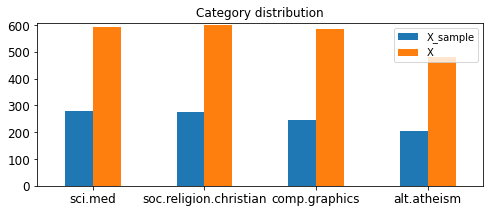

In [7]:
df = DataFrame()
df["X_sample"] = X_sample.category_name.value_counts()
df["X"] = X.category_name.value_counts()

upper_bound = max(max(df["X_sample"]),max(df["X"])) + 10
print(upper_bound)

df.plot(kind = 'bar',title = 'Category distribution',ylim = [0, upper_bound],
        rot = 0, fontsize = 12, figsize = (8,3))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [8]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

The second 1 in the fifth record represents the 01 term.

In [9]:
for i in range(100):
    if X_counts[4,i] == 1:
        print(i)
        print(count_vect.get_feature_names()[i])

0
00
37
01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In the first block I create a daraframe for the frequencies and the vocabulary names. Then I sort the frequencies to find the words which are always used. I plot the heatmap with the top 20 used words and choose any 20 documents. Also, I change the max number in the heatmap. Compare to the old heatmap, there are fewer zeros and demonstrate different frequencies of the words.

In [10]:
term_freq = np.asarray(X_counts.sum(axis=0))[0]

term = pd.DataFrame()
term["name"] = count_vect.get_feature_names()
term["freq"] = term_freq
term_freq_sort = term.sort_values(["freq"],ascending=False)
term_freq_sort[0:20].index

Int64Index([32142, 23610, 32493,  4992, 18474, 17556, 32139, 18551, 35638,
            14601, 23250, 32270,  6298, 14887,  5410, 12626, 16254,  5549,
            23733, 35157],
           dtype='int64')

In [11]:
term_index = np.array(term_freq_sort[0:20].index)

In [12]:
plot_x = ["term_"+str(i) for i in term_freq_sort["name"][0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[100:120]]
plot_z = X_counts[100:120, term_index].toarray()

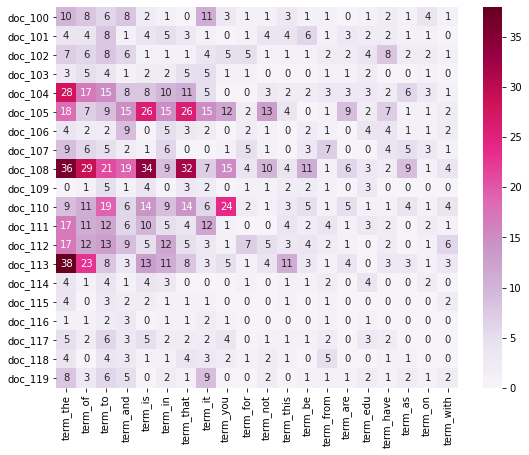

In [13]:
max_num = np.max(np.max(plot_z,axis=0))
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=max_num, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [14]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape

(2257, 3)

Compare to the 2D plot, I can see the dots in the plot is more scattered in the 3D plot than in 2D plot. The dots are still get together in a specific region. However, the distance between the dots in three dimension exists.  Moreover, the difference between the categories is easier to observe on the 3D plot.

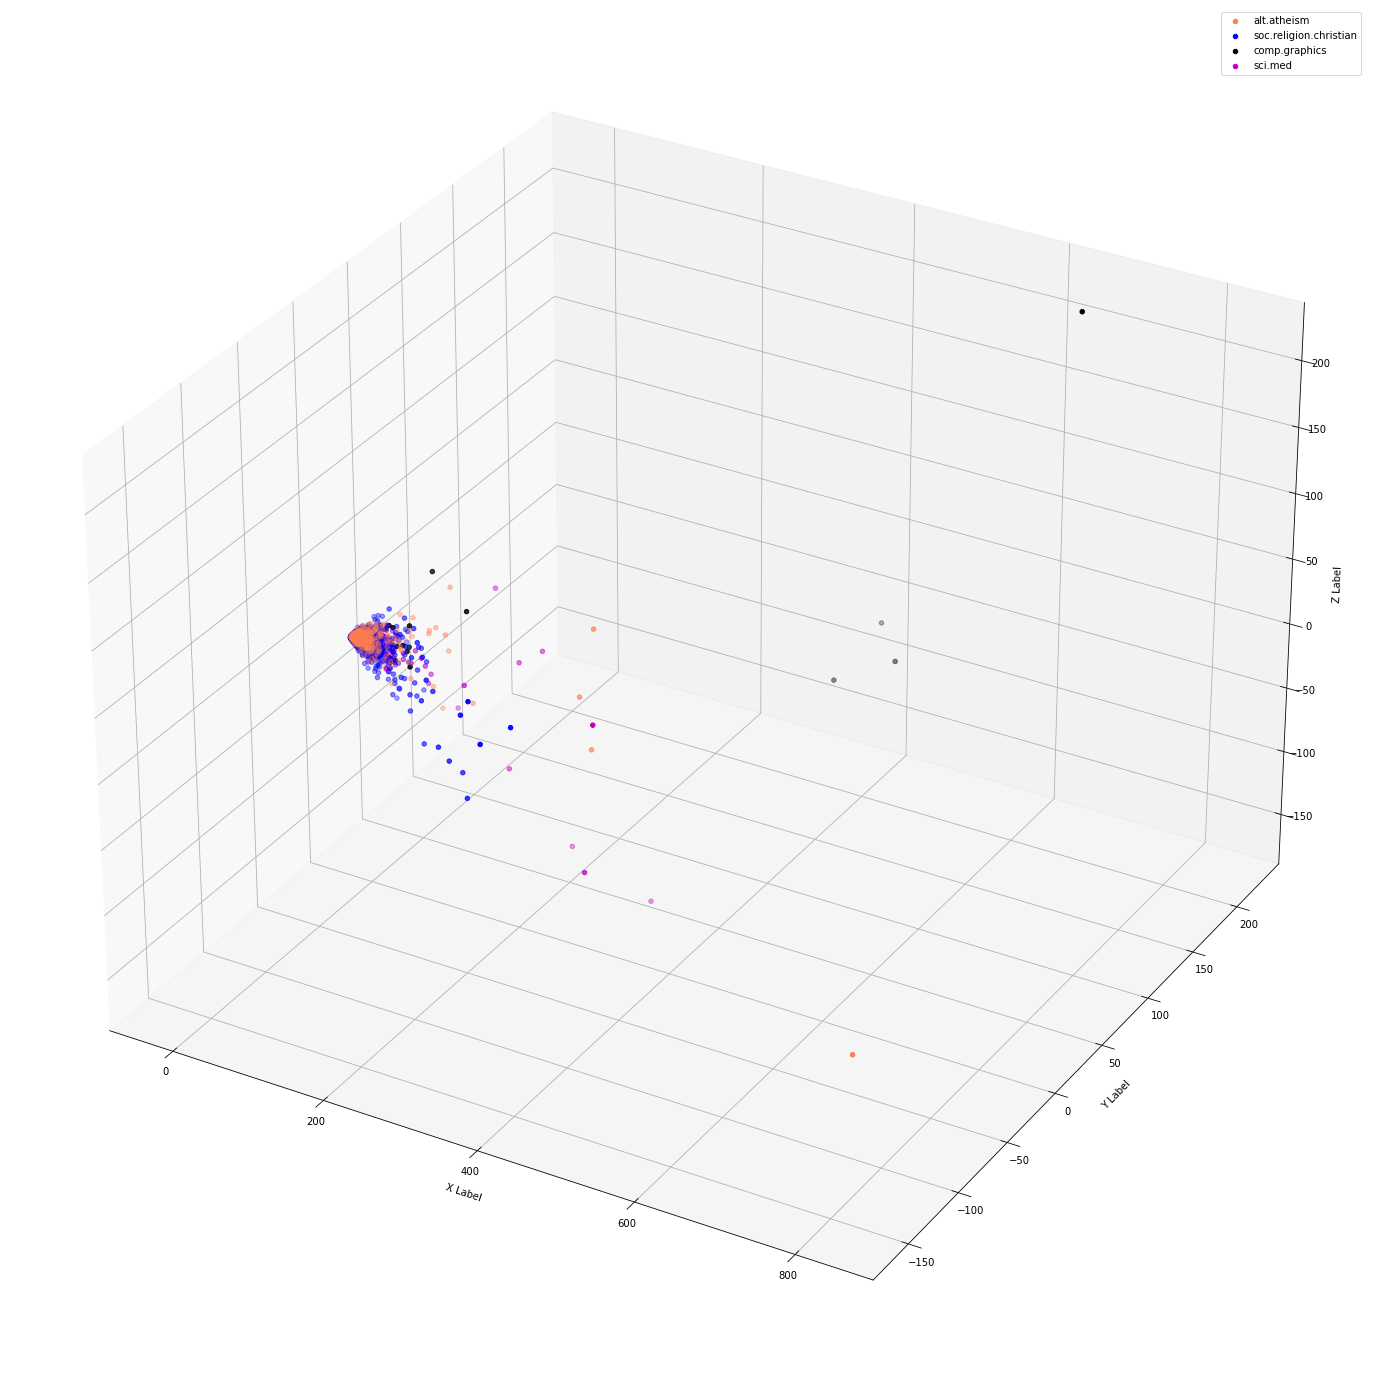

In [15]:
col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize=(25,25))
ax1 = fig.add_subplot(projection = '3d')


for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax1.scatter(xs, ys, zs, c = c, marker = 'o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax1.legend(categories)
plt.show()

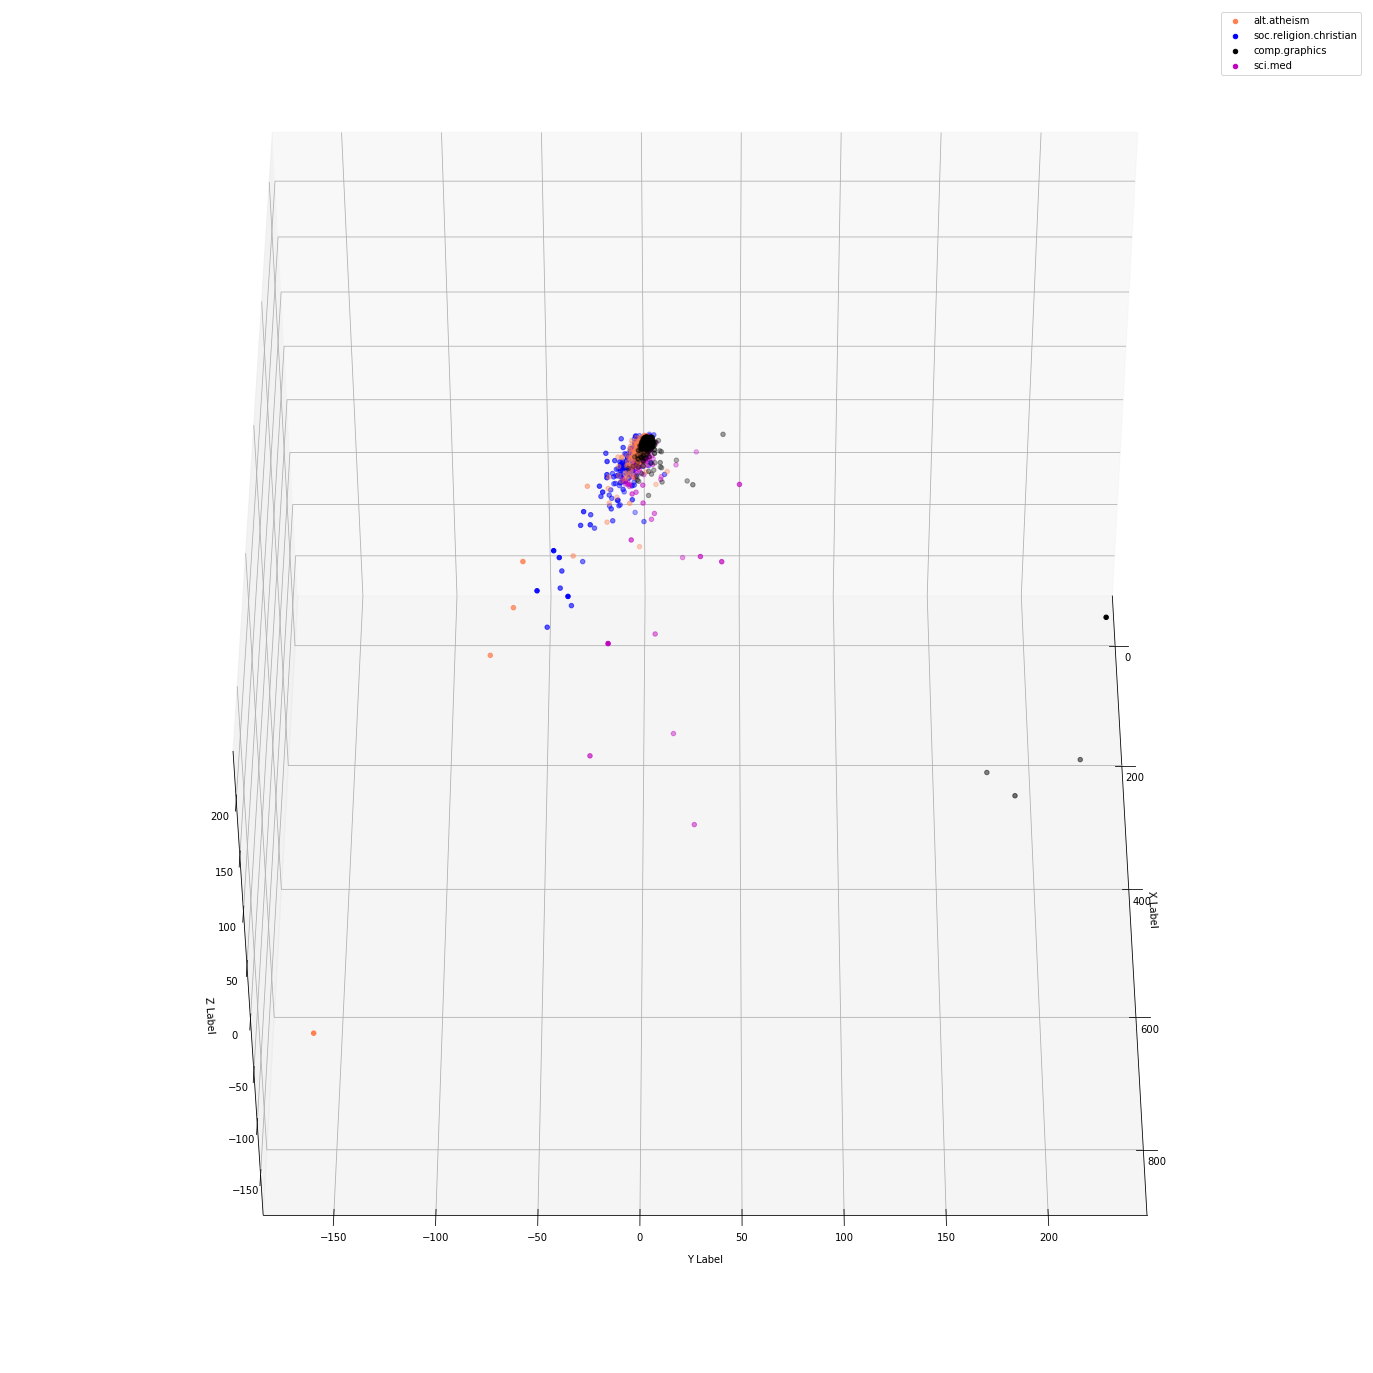

In [16]:
fig = plt.figure(figsize=(25,25))
ax2 = fig.add_subplot(projection = '3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax2.scatter(xs, ys, zs, c = c, marker = "o")

    ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

ax2.view_init(elev=45,azim=0)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.legend(categories)
plt.show()

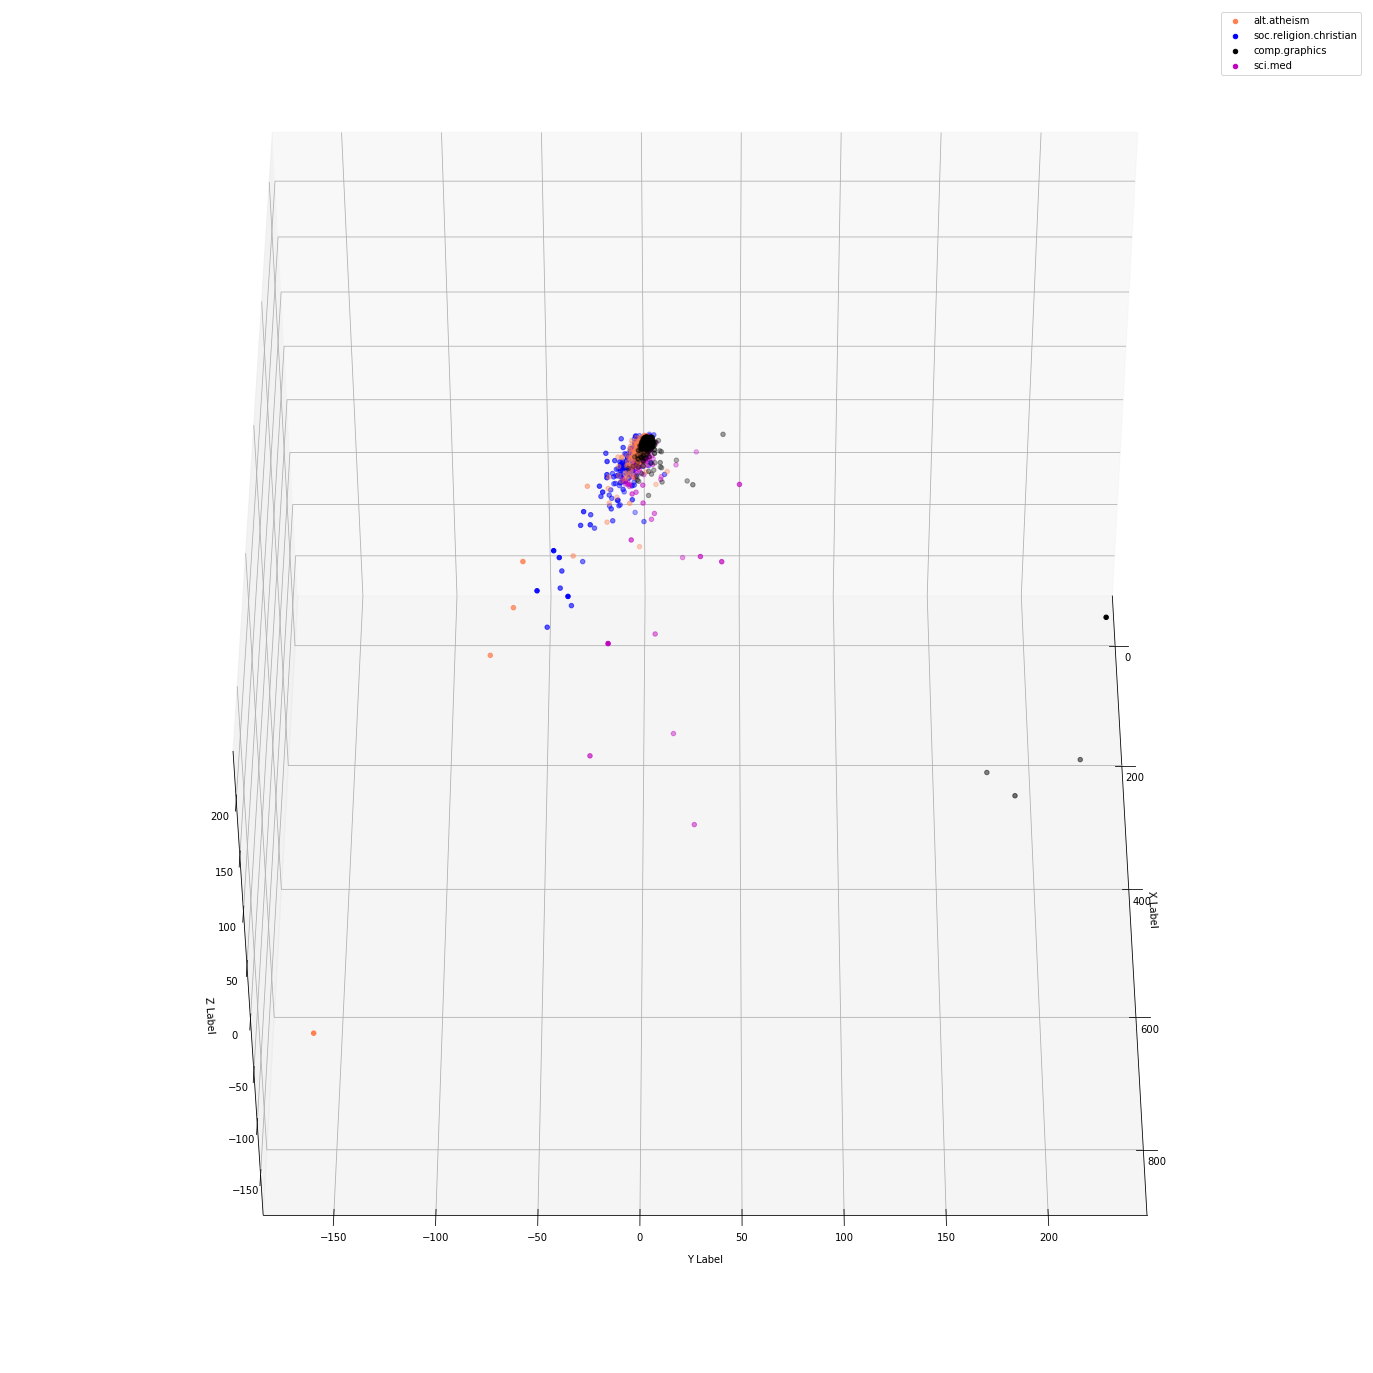

In [17]:
fig = plt.figure(figsize=(25,25))
ax3 = fig.add_subplot(projection = '3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax3.scatter(xs, ys, zs, c = c, marker = "o")

ax3.view_init(elev=45,azim=0)
ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')
ax3.legend(categories)

plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

If I use the plotly to plot the figure, I can zoom in and zoom out to see the small number in the figure. Also, I can know the actual number in the figure when I move the mouse on the bar.

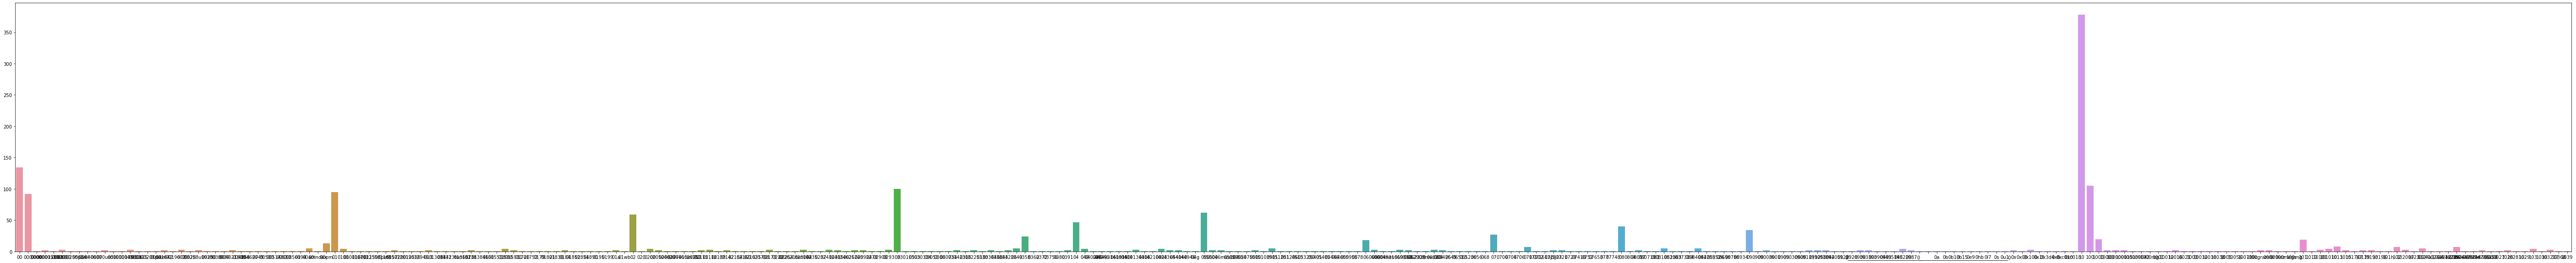

In [18]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], y=term_frequencies[:300])

In [19]:
fig = px.bar(x=count_vect.get_feature_names()[0:300], y=term_frequencies[0:300])
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

To reduce the number of the terms, I set a threshold to pick the words show more frequently. From the plot we can see the word the is the most used, and the word of and to follow behind.

In [20]:
x = []
y = []
freq = 500
for i in range(len(term_frequencies)):
    if term_frequencies[i] >= freq:
        x.append(count_vect.get_feature_names()[i])
        y.append(term_frequencies[i])

print(len(x),len(y))

143 143


In [21]:
fig = px.bar(x = x,y = y)
fig.show()

### >>> **Exercise 15 (take home):**
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [22]:
df = pd.DataFrame()
df["X"] = count_vect.get_feature_names()
df["Y"] = term_frequencies
df

X    Y
0                00  134
1               000   92
2              0000    1
3        0000001200    2
4      000005102000    1
...             ...  ...
35783         zyxel    2
35784            zz    1
35785           zzz    1
35786            ªl    1
35787      íålittin    1

[35788 rows x 2 columns]

In [23]:
df_new = df.sort_values(["Y"],ascending=False)
df_new

X      Y
32142       the  29825
23610        of  17660
32493        to  17222
4992        and  13017
18474        is  12343
...         ...    ...
24661       pcb      1
24662   pcboard      1
24663     pccvm      1
24664      pcd7      1
35787  íålittin      1

[35788 rows x 2 columns]

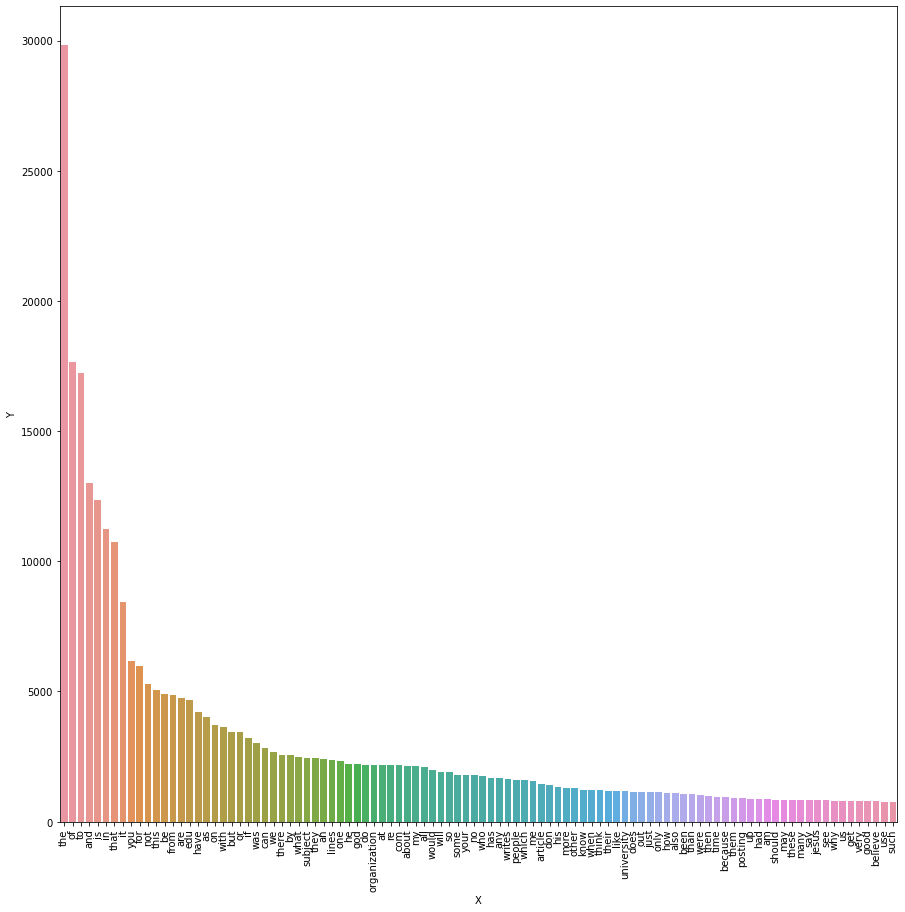

In [24]:
plt.subplots(figsize=(15,15))
fig = sns.barplot(x = df_new["X"][0:100],y = df_new["Y"][0:100])
fig.set_xticklabels(df_new["X"][0:100], rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [25]:
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

LabelBinarizer()

In [26]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

### >>> **Second : New Dataset**

I read the txt files in lines and create a dataframe for each file with the label of text, label, and label name. Then I concatenate three dataframes to a dataframe.

In [27]:
def read_new_dataset(path):
    text = []
    label = []
    name = []
    with open(path,"r",encoding="utf-8") as f:
        lines = f.readlines()
        for line in lines:
            text.append(line.split("\t")[0])
            label.append(int(line.split("\t")[1].strip("\n")))
            cate = int(line.split("\t")[1].strip("\n"))
            if cate == 1:
                name.append("positive")
            else:
                name.append("negative")
    df = pd.DataFrame()
    df["text"] = text
    df["label"] = label
    df["label_name"] = name
    return df

In [28]:
path_am = "sentiment labelled sentences/amazon_cells_labelled.txt"
path_imdb = "sentiment labelled sentences/imdb_labelled.txt"
path_yelp = "sentiment labelled sentences/yelp_labelled.txt"

df_am = read_new_dataset(path_am)
df_im = read_new_dataset(path_imdb)
df_ye = read_new_dataset(path_yelp)

Y = pd.concat([df_am,df_im,df_ye],axis=0,ignore_index=True)

In [29]:
Y[995:1005]

text  label label_name
995   The screen does get smudged easily because it ...      0   negative
996   What a piece of junk.. I lose more calls on th...      0   negative
997                        Item Does Not Match Picture.      0   negative
998   The only thing that disappoint me is the infra...      0   negative
999   You can not answer calls with the unit, never ...      0   negative
1000  A very, very, very slow-moving, aimless movie ...      0   negative
1001  Not sure who was more lost - the flat characte...      0   negative
1002  Attempting artiness with black & white and cle...      0   negative
1003       Very little music or anything to speak of.        0   negative
1004  The best scene in the movie was when Gerardo i...      1   positive

In [30]:
Y.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           label_name  
0  The amoung of missing records is:   
1                                   0

In [31]:
Y.duplicated("text")

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [32]:
print(sum(Y.duplicated("text")))
print(len(Y))

Y.drop_duplicates(keep=False, inplace=True)
print(len(Y))

17
3000
2966


In [33]:
Y_sample = Y.sample(n=500)
Y_sample[0:5]

text  label label_name
2669  Google mediocre and I imagine Smashburger will...      0   negative
1237  But what really made it unwatchable was the di...      0   negative
2161                          I was seated immediately.      1   positive
2628  I asked multiple times for the wine list and a...      0   negative
1598  Every element of this story was so over the to...      0   negative

negative    1486
positive    1480
Name: label_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

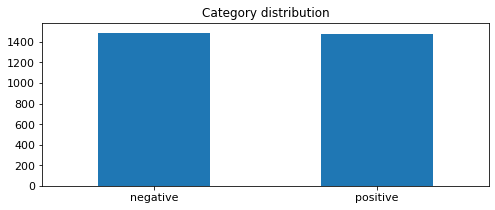

In [34]:
print(Y.label_name.value_counts())

upper_bound = max(Y.label_name.value_counts()) + 100

Y.label_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [35]:
Y['unigrams'] = Y['text'].apply(lambda x: dmh.tokenize_text(x))
Y[0:4]

text  label label_name  \
0  So there is no way for me to plug it in here i...      0   negative   
1                        Good case, Excellent value.      1   positive   
2                             Great for the jawbone.      1   positive   
3  Tied to charger for conversations lasting more...      0   negative   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [36]:
count_vect = CountVectorizer()
Y_counts = count_vect.fit_transform(Y.text)
Y_counts.shape

(2966, 5153)

In [37]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

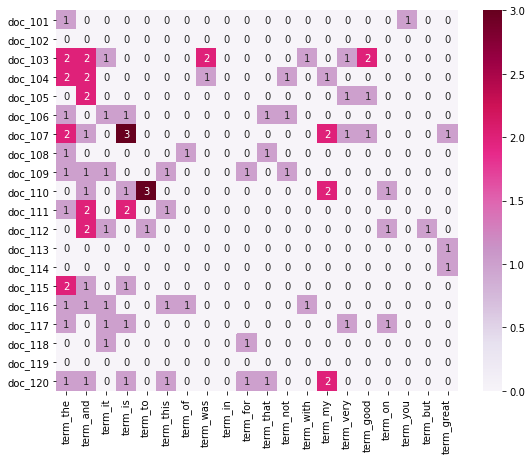

In [38]:
term_freq = np.asarray(Y_counts.sum(axis=0))[0]

term = pd.DataFrame()
term["name"] = count_vect.get_feature_names()
term["freq"] = term_freq
term_freq_sort = term.sort_values(["freq"],ascending=False)
term_index = np.array(term_freq_sort[0:20].index)

plot_x = ["term_"+str(i) for i in term_freq_sort["name"][0:20]]
plot_y = ["doc_"+ str(i) for i in list(Y.index)[100:120]]
plot_z = Y_counts[100:120, term_index].toarray()

max_num = np.max(np.max(plot_z,axis=0))
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=max_num, annot=True)

In [39]:
Y_reduced = PCA(n_components = 2).fit_transform(Y_counts.toarray())
Y_reduced.shape

(2966, 2)

In [40]:
categories = ["negative","positive"]

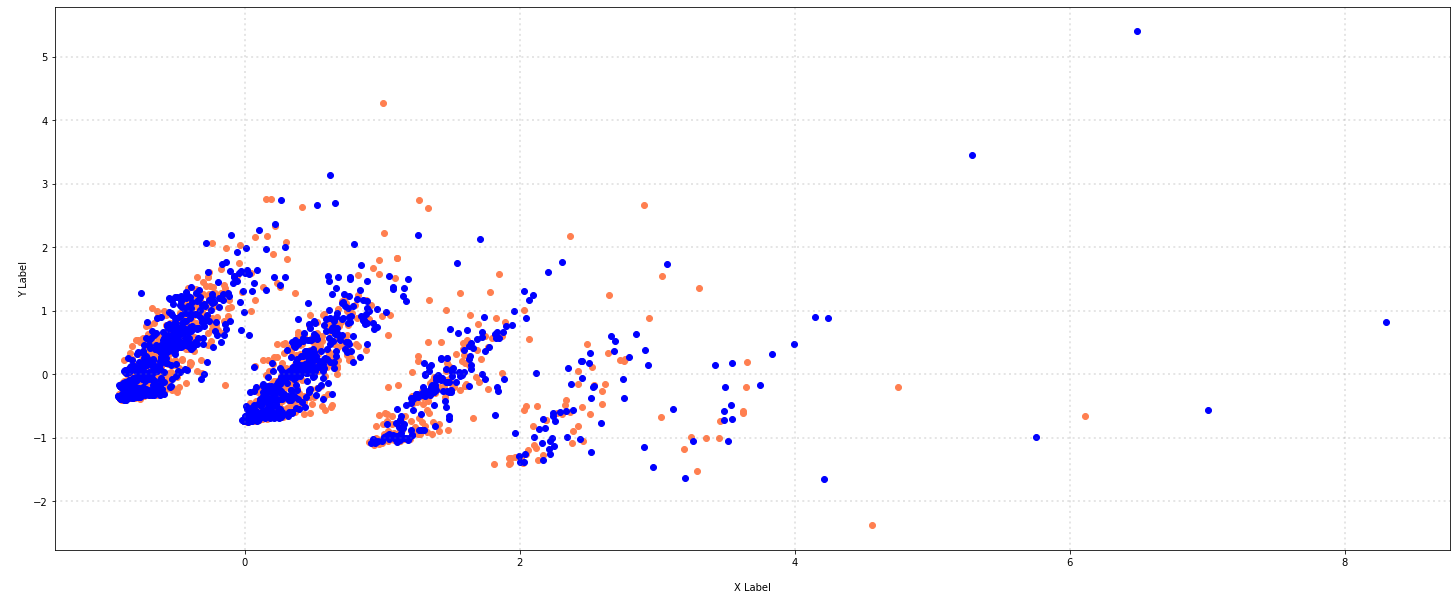

In [41]:
col = ['coral', 'blue']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = Y_reduced[Y['label_name'] == category].T[0]
    ys = Y_reduced[Y['label_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [42]:
term_frequencies = np.asarray(Y_counts.sum(axis=0))[0]

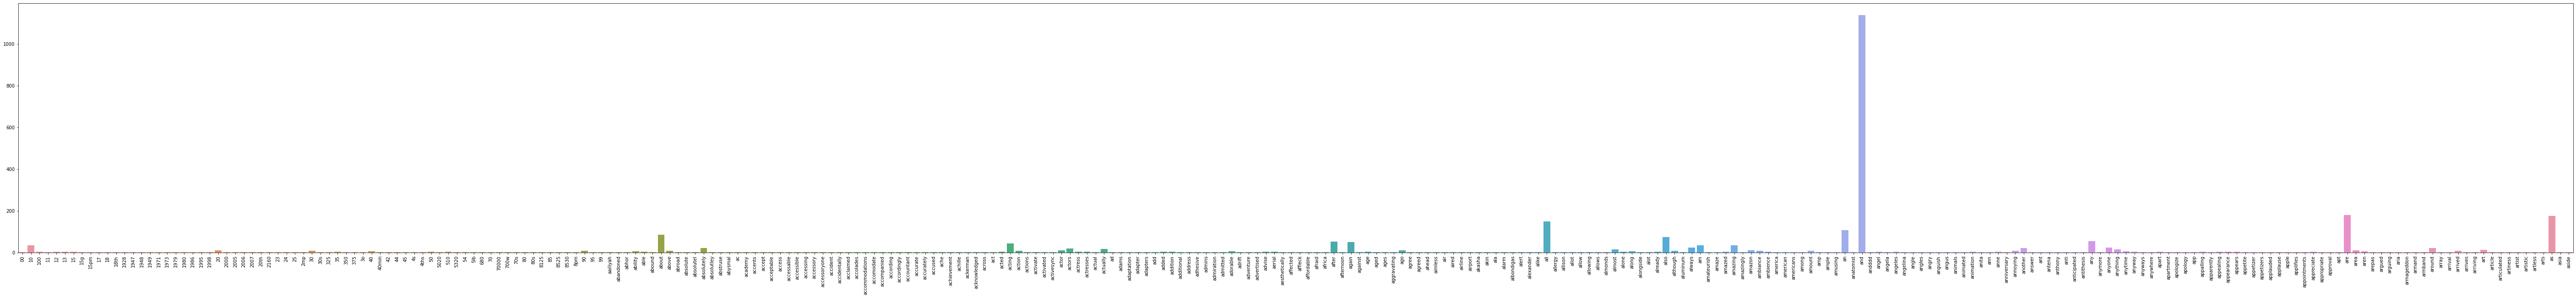

In [43]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

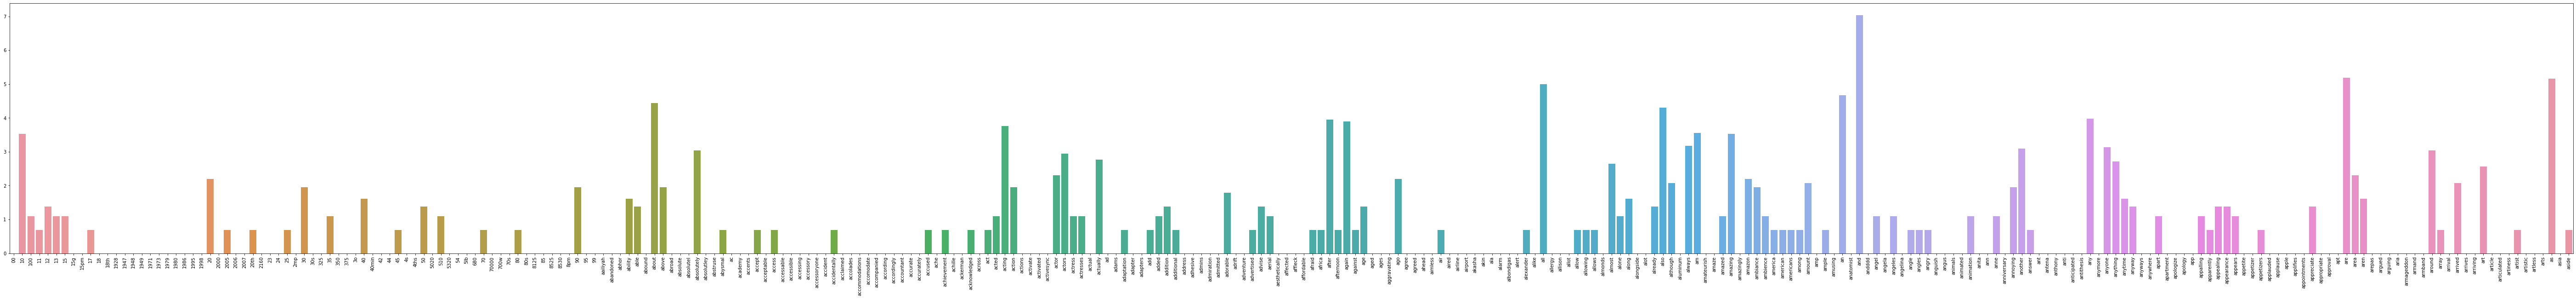

In [44]:
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [45]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(Y.label_name)
print(mlb.classes_)
Y['bin_category'] = mlb.transform(Y["label_name"]).tolist()
Y[0:5]

['negative' 'positive']


text  label label_name  \
0  So there is no way for me to plug it in here i...      0   negative   
1                        Good case, Excellent value.      1   positive   
2                             Great for the jawbone.      1   positive   
3  Tied to charger for conversations lasting more...      0   negative   
4                                  The mic is great.      1   positive   

                                            unigrams bin_category  
0  [So, there, is, no, way, for, me, to, plug, it...          [0]  
1               [Good, case, ,, Excellent, value, .]          [1]  
2                      [Great, for, the, jawbone, .]          [1]  
3  [Tied, to, charger, for, conversations, lastin...          [0]  
4                           [The, mic, is, great, .]          [1]

### ** >>> Third : Generate TF-IDF features and Naive Bayes classifier on new dataset** 

I plot a figure of the wordcloud based on the appearence frequencies of the words.

In [46]:
term_wc = pd.DataFrame()
term_wc.index = count_vect.get_feature_names()
term_wc["freq"] = term_freq/np.sum(term_freq)
term_wc = term_wc.sort_values(["freq"],ascending=False)

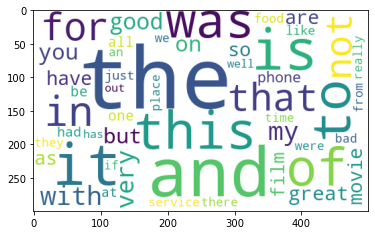

In [47]:
from wordcloud import WordCloud

plt.figure()
cloud = WordCloud(width = 500, height = 300, max_words=50,background_color="white").generate_from_frequencies(term_wc["freq"])
plt.imshow(cloud)

Find the words appear more frequently.

In [48]:
vectorizer = TfidfVectorizer(sublinear_tf=False, stop_words=None, smooth_idf=True)
tfidf = vectorizer.fit_transform(Y["text"])
df_tfidf = pd.DataFrame(tfidf.toarray(),columns=vectorizer.get_feature_names())
tfidf_ = np.mean(df_tfidf,axis=0)
tfidf_ = pd.DataFrame(tfidf_,columns=["tfidf"])
tfidf_.sort_values(by='tfidf',ascending=False,inplace = True)
tfidf_[:10]

tfidf
the   0.059413
and   0.039891
it    0.038282
is    0.035713
this  0.032243
was   0.031498
to    0.028382
of    0.026443
not   0.020067
in    0.019810

Plot the words appear more frequently in barplot.

<Figure size 432x288 with 0 Axes>

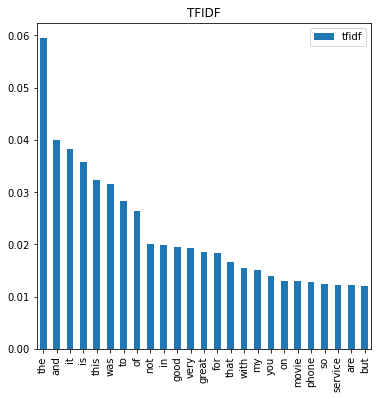

In [49]:
plt.figure()
tfidf_[0:25].plot(kind ='bar',title='TFIDF',figsize=(6,6))
plt.show()

Create Naive Bayes classifier with the funciton MultinomialNB, and use the function pipline to create the classifier easilier. To create the TF and TFIDF classifier, I change the variable in function TfidfTransformer and test both classifier with the randomly chosen test samples.

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

Y_test = Y.sample(n=500)

tf_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer(use_idf=False)),('clf', MultinomialNB())])
tf_clf.fit(Y.text, Y.label)
tf_predict = tf_clf.predict(Y_test.text)

In [51]:
tfidf_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
tfidf_clf.fit(Y.text, Y.label)
tfidf_predict = tfidf_clf.predict(Y_test.text)

The results show that the classifier using TFIDF has a little improvement than the one using only TF.

In [52]:
tf_acc = np.mean(tf_predict == Y_test.label)
tfidf_acc = np.mean(tfidf_predict == Y_test.label)
print('Accuracy of classifer with TF is {:f}'.format(tf_acc))
print('Accuracy of classifer with TF-IDF is {:f}'.format(tfidf_acc))

Accuracy of classifer with TF is 0.928000
Accuracy of classifer with TF-IDF is 0.944000


Plot the confusion matrix to know how many errors in prediction on both type.

In [53]:
from sklearn import metrics
tf_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test.label, tf_predict))
tf_matrix.rename({0:'True negative',1:'True positive'},axis = 0 ,inplace = True)
tf_matrix.rename({0:'Predict negative',1:'Predict positive'},axis = 1 ,inplace = True)
print('Confusion matrix of TF classifer')
tf_matrix

Confusion matrix of TF classifer


Predict negative  Predict positive
True negative               252                10
True positive                26               212

In [54]:
tfidf_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test.label, tfidf_predict))
tfidf_matrix.rename({0:'True negative',1:'True positive'},axis = 0 ,inplace = True)
tfidf_matrix.rename({0:'Predict negative',1:'Predict positive'},axis = 1 ,inplace = True)
print('Confusion matrix of TFIDF classifer')
tfidf_matrix

Confusion matrix of TFIDF classifer


Predict negative  Predict positive
True negative               253                 9
True positive                19               219

### ** >>> Forth : Improve data preprocessing** 

To improve the data preprocessing, I used the stopwords since the words appear more frequently are meaning less, such as the, is , of, and etc. So I create a new dataframe after using stopwords function.

In [55]:
Y_new = Y.copy()
Y_new['text'] = Y_new['text'].str.lower()
Y_new["text"] = Y_new['text'].apply(lambda x: dmh.tokenize_text_stopwords(x,stop_words='english'))
Y_new['text'] = Y_new['text'].apply(lambda x:' '.join(x))
Y_new[0:5]

text  label label_name  \
0                  way plug us unless go converter .      0   negative   
1                      good case , excellent value .      1   positive   
2                                    great jawbone .      1   positive   
3  tied charger conversations lasting 45 minutes....      0   negative   
4                                        mic great .      1   positive   

                                            unigrams bin_category  
0  [So, there, is, no, way, for, me, to, plug, it...          [0]  
1               [Good, case, ,, Excellent, value, .]          [1]  
2                      [Great, for, the, jawbone, .]          [1]  
3  [Tied, to, charger, for, conversations, lastin...          [0]  
4                           [The, mic, is, great, .]          [1]

Compare to the dataframe before stopword funciton, the words appear more often become more meaningful.

In [56]:
vectorizer = TfidfVectorizer(sublinear_tf=False, stop_words=None, smooth_idf=True)
tfidf_new = vectorizer.fit_transform(Y_new.text)
df_tfidf_new = pd.DataFrame(tfidf_new.toarray(),columns=vectorizer.get_feature_names())
tfidf_new_ = np.mean(df_tfidf_new,axis=0)
tfidf_new_ = pd.DataFrame(tfidf_new_,columns=["tfidf"])
tfidf_new_.sort_values(by='tfidf',ascending=False,inplace = True)
tfidf_new_[:10]

tfidf
good     0.022072
great    0.020521
movie    0.014936
phone    0.014641
service  0.013476
food     0.013131
film     0.012854
bad      0.011587
place    0.011425
one      0.011314

I use the processed data to bulid the classifier, and the results of the classifier with TFIDF is still better than the one with TF.

In [57]:
Y_new_test = Y_new.sample(n=500)

tf_clf_new = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer(use_idf=False)),('clf', MultinomialNB())])
tf_clf_new.fit(Y_new.text, Y_new.label)
tf_predict_new = tf_clf_new.predict(Y_new_test.text)

tfidf_clf_new = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
tfidf_clf_new.fit(Y_new.text, Y_new.label)
tfidf_predict_new = tfidf_clf_new.predict(Y_new_test.text)

In [58]:
tf_acc_new = np.mean(tf_predict_new == Y_new_test.label)
tfidf_acc_new = np.mean(tfidf_predict_new == Y_new_test.label)
print('Accuracy of new classifer with TF is {:f}'.format(tf_acc_new))
print('Accuracy of new classifer with TF-IDF is {:f}'.format(tfidf_acc_new))

Accuracy of new classifer with TF is 0.934000
Accuracy of new classifer with TF-IDF is 0.954000


In [59]:
tf_matrix_new = pd.DataFrame(metrics.confusion_matrix(Y_new_test.label, tf_predict_new))
tf_matrix_new.rename({0:'True negative',1:'True positive'},axis = 0 ,inplace = True)
tf_matrix_new.rename({0:'Predict negative',1:'Predict positive'},axis = 1 ,inplace = True)
print('Confusion matrix of new TF classifer')
tf_matrix_new

Confusion matrix of new TF classifer


Predict negative  Predict positive
True negative               239                20
True positive                13               228

In [60]:
tfidf_matrix_new = pd.DataFrame(metrics.confusion_matrix(Y_new_test.label, tfidf_predict_new))
tfidf_matrix_new.rename({0:'True negative',1:'True positive'},axis = 0 ,inplace = True)
tfidf_matrix_new.rename({0:'Predict negative',1:'Predict positive'},axis = 1 ,inplace = True)
print('Confusion matrix of new TFIDF classifer')
tfidf_matrix_new

Confusion matrix of new TFIDF classifer


Predict negative  Predict positive
True negative               244                15
True positive                 8               233

The classifiers with the stopwords function have better results than the ones without stopwords function. I think the reason for the better results is the large amount of the meaningless words are deleted.

In [61]:
print('Accuracy of classifer with TF is {:f}'.format(tf_acc))
print('Accuracy of classifer with TF-IDF is {:f}'.format(tfidf_acc))
print('Accuracy of new classifer with TF is {:f}'.format(tf_acc_new))
print('Accuracy of new classifer with TF-IDF is {:f}'.format(tfidf_acc_new))

Accuracy of classifer with TF is 0.928000
Accuracy of classifer with TF-IDF is 0.944000
Accuracy of new classifer with TF is 0.934000
Accuracy of new classifer with TF-IDF is 0.954000
